In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


anime = pd.read_csv("../data/anime.csv")
rating = pd.read_csv("../data/rating.csv")

print(f"Dataset : {anime.shape}")
print(anime.info())


Dataset : (12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [41]:
mergeData = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
mergeData = mergeData.rename(columns={"rating_user": "user_rating"})

print(f"Merge dataset : {mergeData.shape}")
mergeData.head()



Merge dataset : (7813727, 9)


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


## Setup des couleurs

In [42]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

## Nombre de membres en fonction des animés

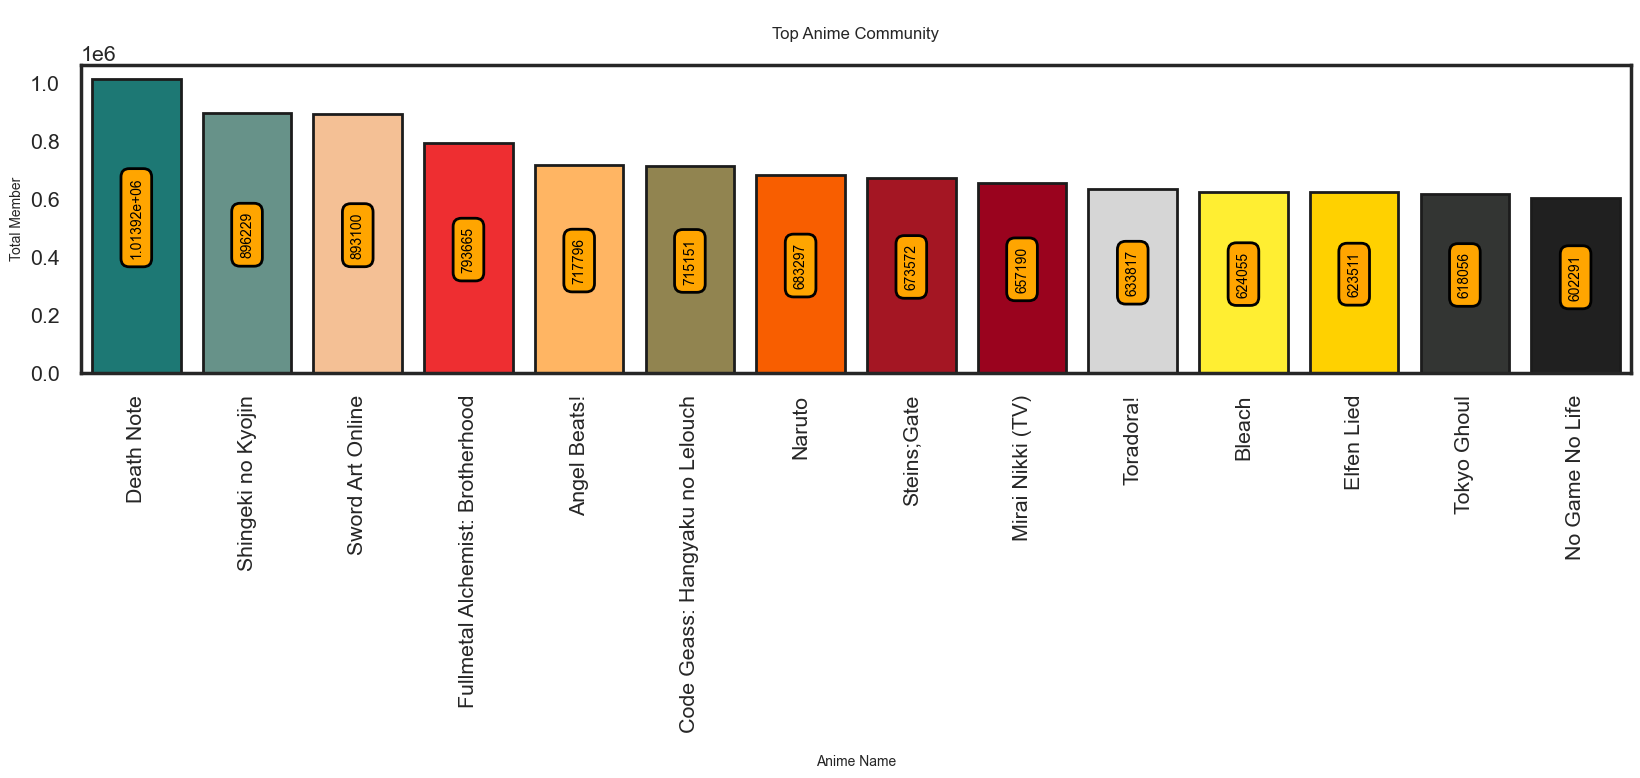

In [51]:
top_anime = mergeData.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

# Setup du graphique
plt.subplots(figsize=(20,4))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=12)
plt.ylabel("Total Member" , fontsize = 10)
plt.xlabel("\nAnime Name" , fontsize = 10)
plt.xticks(rotation = 90)

#Design des valeurs dans les bars
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 10,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

plt.show()

* **Death Note** wears the crown for highest community members followed by **Shingeki no Kyojin** and **Sword Art Online**

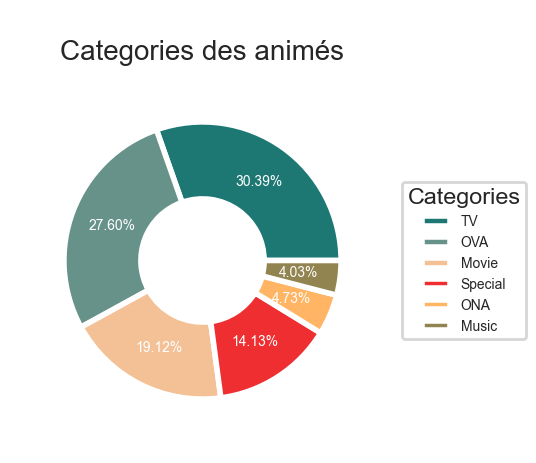

In [62]:
# Affichage avec un graphique PIE

plt.subplots(figsize=(5, 5))

#Listing de tous les types rentrés à la main (car ils ne sont pas beaucoup)
labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    wedgeprops=dict(width = size, 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categories",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
plt.title("\nCategories des animés",fontsize=20)
plt.show()

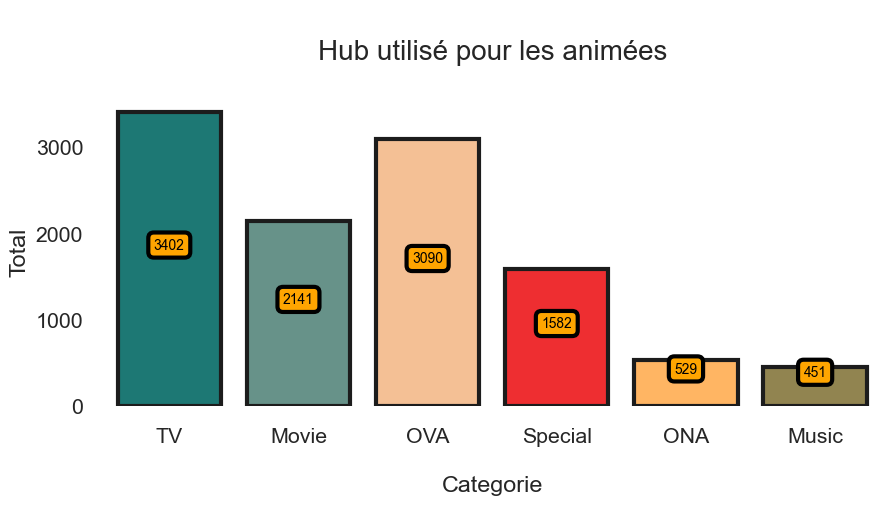

In [71]:
#Même chose avec un histogramme et avec des vrais valeurs et non des pourcentages
plt.subplots(figsize = (10,4))
p = sns.countplot(x = top_anime_temp1["type"], palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nHub utilisé pour les animées\n" ,fontsize = 20)
plt.ylabel("Total")
plt.xlabel("\nCategorie")
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 10,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

# Classement général des animés

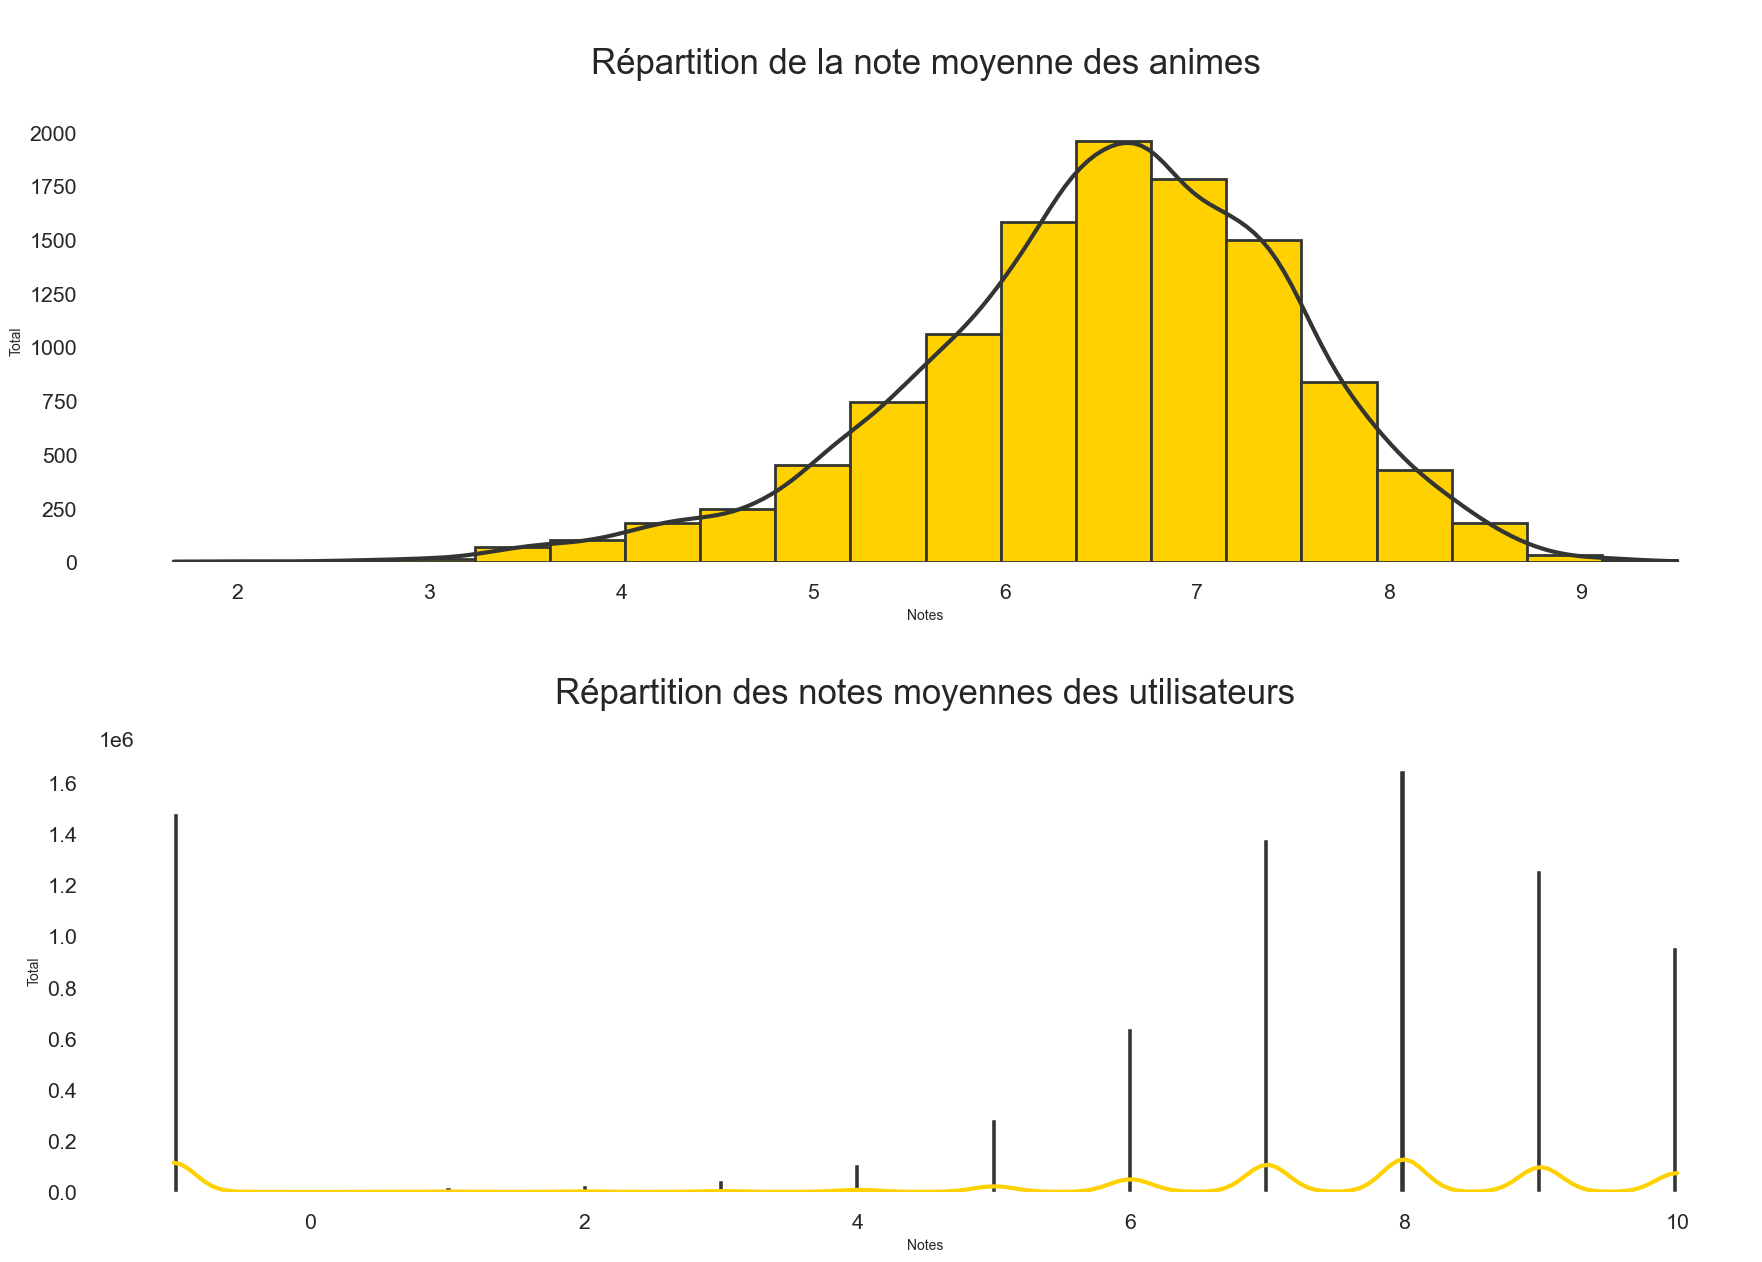

In [75]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,14),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nRépartition de la note moyenne des animes\n",fontsize = 25)
axs[0].set_xlabel("Notes\n", fontsize = 10)
axs[0].set_ylabel("Total", fontsize = 10)

sns.histplot(mergeData["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n\n\nRépartition des notes moyennes des utilisateurs\n",fontsize = 25)
axs[1].set_xlabel("Notes", fontsize = 10)
axs[1].set_ylabel("Total", fontsize = 10)

sns.despine(left=True, bottom=True)
plt.show()

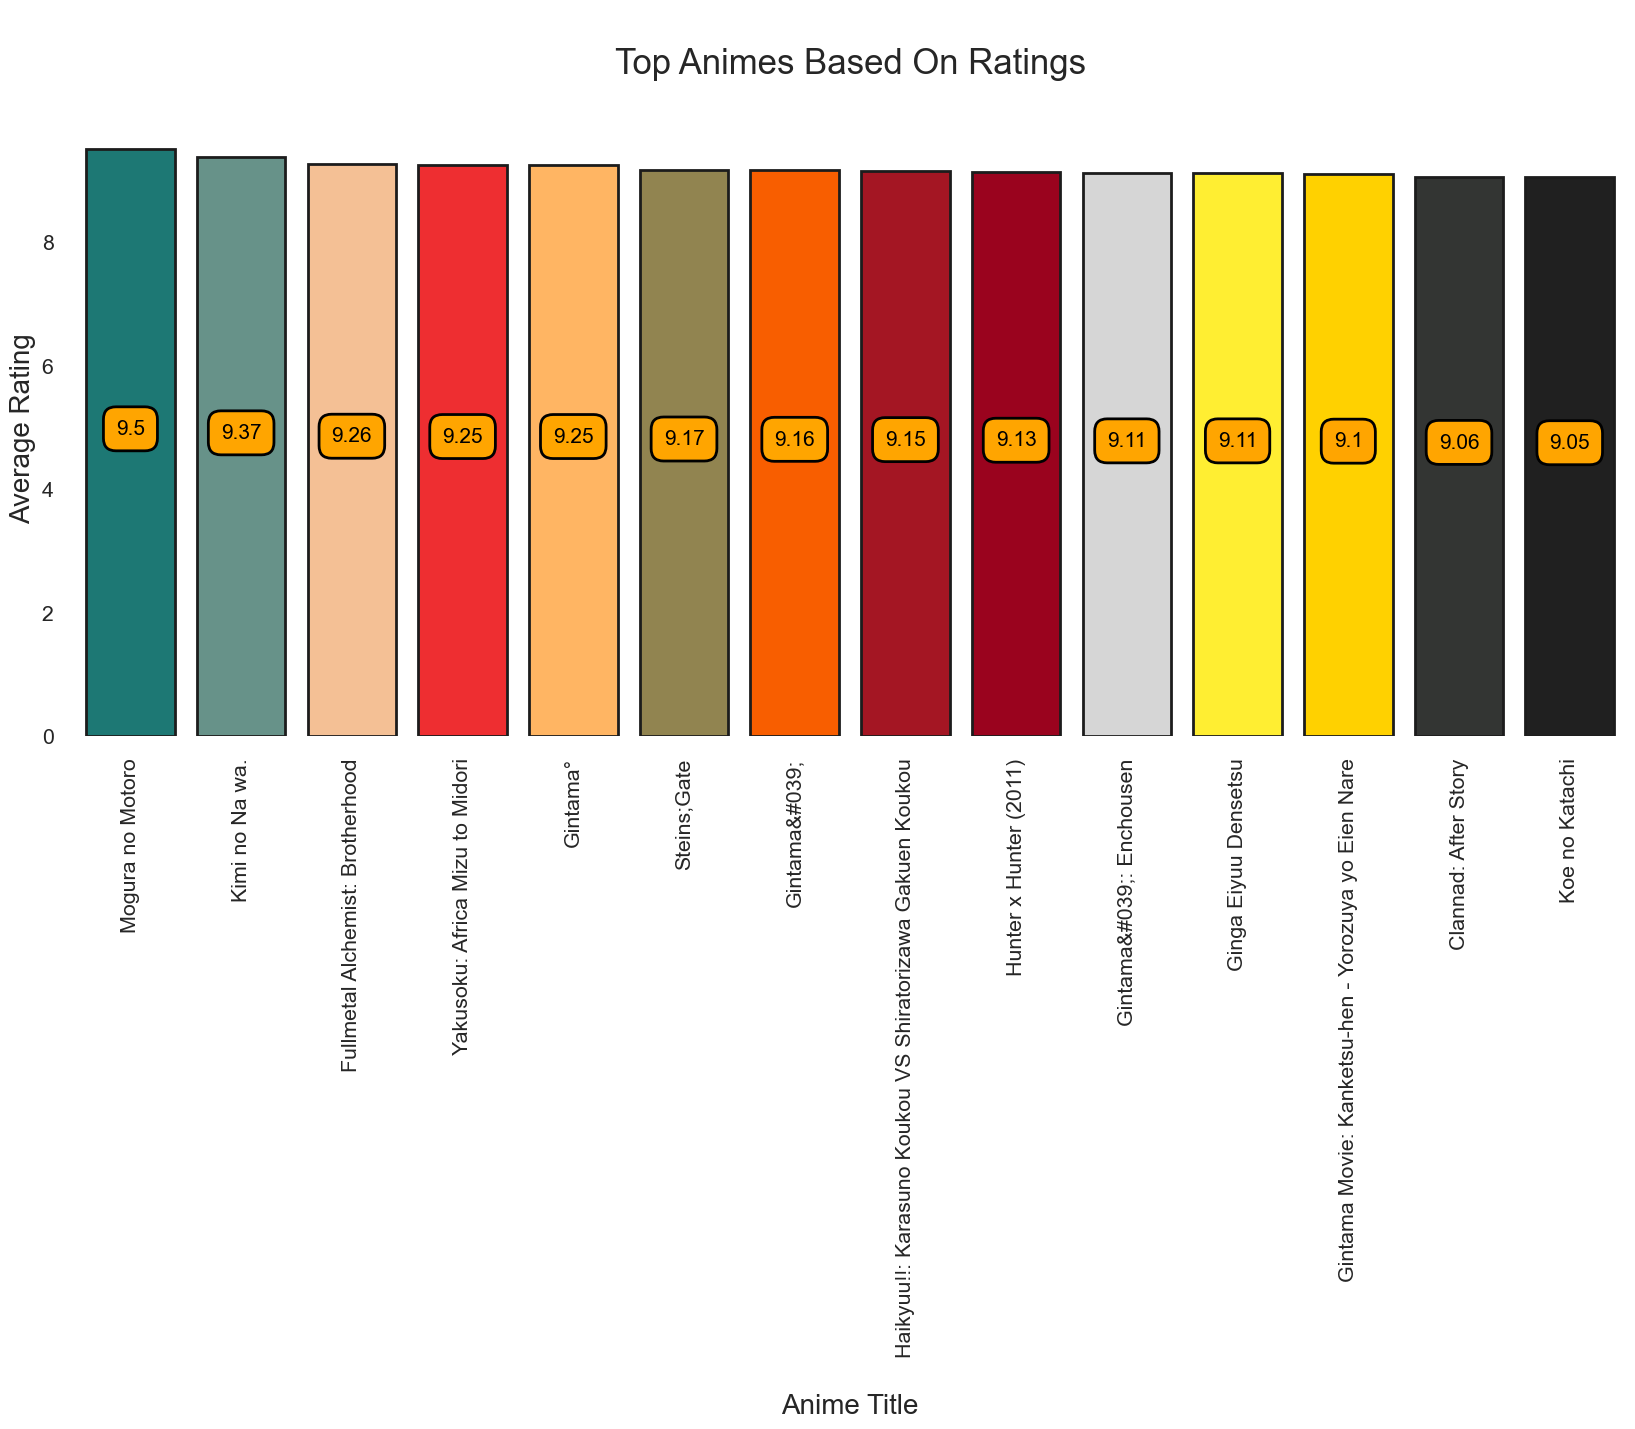

In [16]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nLes animés les mieux notés\n",fontsize = 25)
plt.ylabel("Meilleure note",fontsize = 20)
plt.xlabel("\nTitre de l'animé",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

#  Distribution des classements d'animes par catégorie

Maintenant, on va regarder la distribution des notes concernant la catégorie : TV 



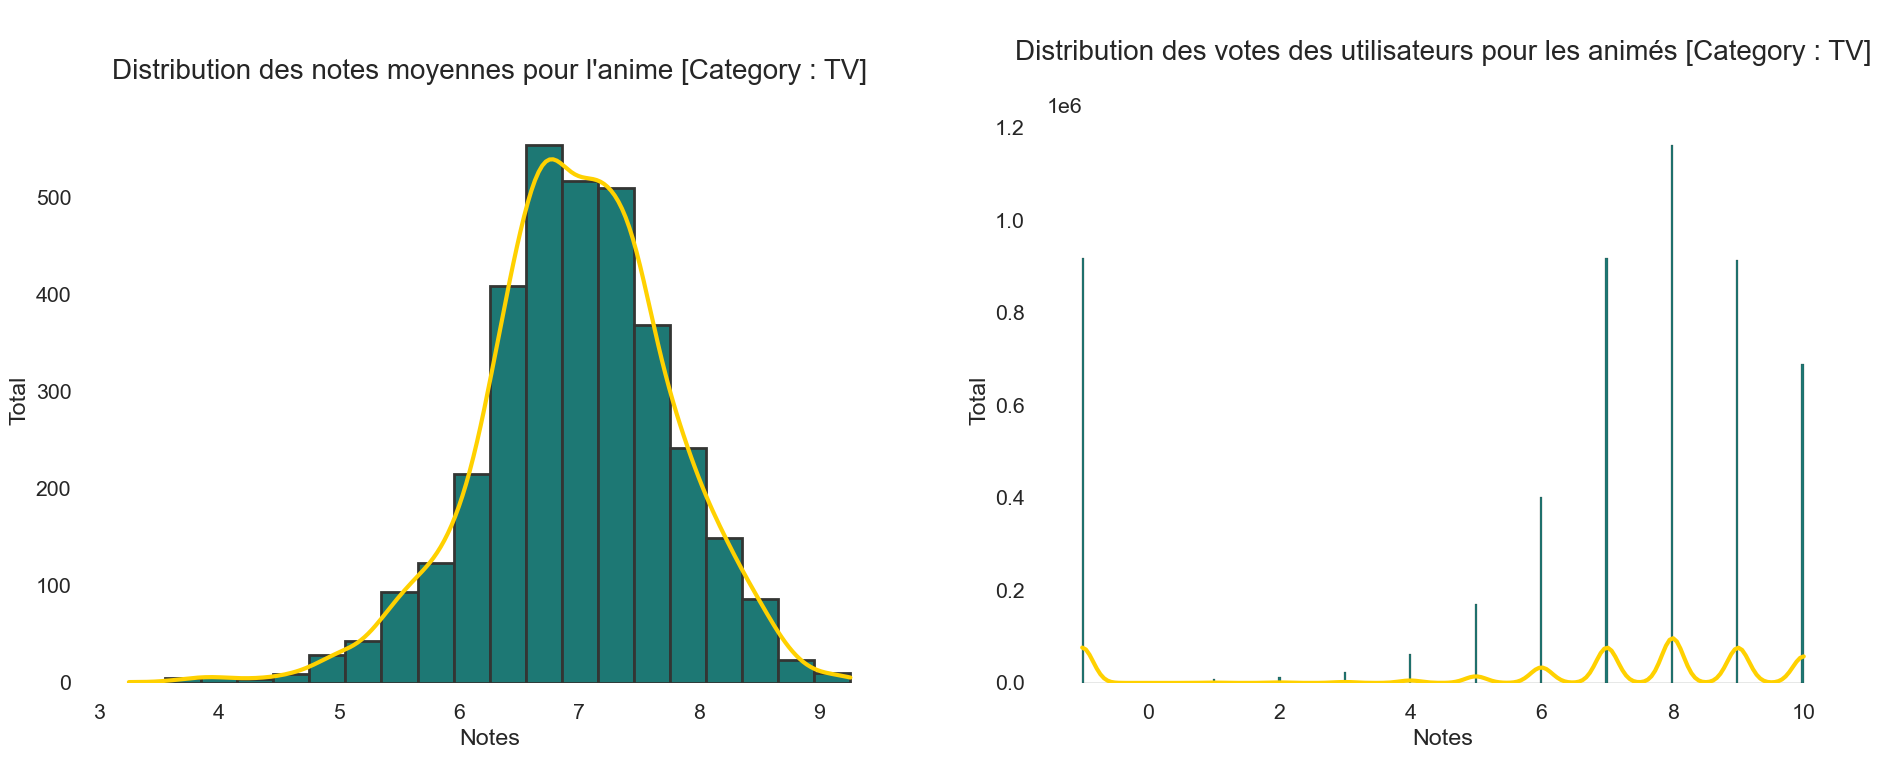

In [79]:
print("Maintenant, on va regarder la distribution des notes concernant la catégorie : TV \n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nDistribution des notes moyennes pour l'anime [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Notes")
axs[0].set_ylabel("Total")

sns.histplot(mergeData[mergeData["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nDistribution des votes des utilisateurs pour les animés [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Notes")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

# Genre des animés

In [ ]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Il existe {len(top_anime_temp3["genre"].unique())}' ' genres')
top_anime_temp3["genre"].value_counts().to_frame()

# Final Data preprocessing

In [78]:
data = mergeData.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame()

Null values after final pre-processing :


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


Il y a beaucoup d'utilisateurs qui n'ont donné leur avis qu'une seule fois, même s'ils ont évalué 5 animes, cela ne peut pas être considéré comme un enregistrement précieux pour la recommandation. Nous considérerons donc une valeur seuil minimale de 30 évaluations par utilisateur.

Le but étant d'éviter de proposer aux autres utilisateurs des animés qui n'auraient aucun sens. Si l'utilisateur à noter 30 fois, cela veut dire que ca reste un gros consommateur d'animés, donc son avis est très précieux pour nous.

In [80]:
selected_users = data["user_id"].value_counts()
min_user_ratings = 30
data = data[data["user_id"].isin(selected_users[selected_users >= min_user_ratings].index)]

Nous allons créer une table croisée dynamique composée de lignes de titres et de colonnes d'identifiants d'utilisateur. Cela nous aidera à créer une matrice creuse qui peut être très utile pour trouver la similarité cosinus.

In [ ]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head(50)

Il y a beaucoup de caractères japonais, on va donc créer une fonction permettant de remplacer ou supprimer tout ça.

In [82]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)

# Collaborative Recommender

Le filtrage collaboratif est une technique qui permet de filtrer les éléments qu'un utilisateur pourrait aimer en se basant sur les réactions d'utilisateurs similaires. Il fonctionne en cherchant dans un grand groupe de personnes et en trouvant un ensemble plus restreint d'utilisateurs ayant des goûts similaires à un utilisateur particulier. Nous utiliserons la similarité cosinus, qui est une mesure utilisée pour déterminer à quel point les documents sont similaires, indépendamment de leur taille. Mathématiquement, elle mesure le cosinus de l'angle entre deux vecteurs projetés dans un espace multidimensionnel. La similarité cosinus est avantageuse car même si les deux documents similaires sont éloignés l'un de l'autre par la distance euclidienne (en raison de la taille du document), il y a de fortes chances qu'ils soient orientés plus proches l'un de l'autre. Plus l'angle est petit, plus la similarité cosinus est élevée.

In [93]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and finding recommendation
print(f"Nous allons trouver des recommandations pour le {query_no} eme animé qui est : {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

Nous allons trouver des recommandations pour le 875 eme animé qui est : Black Jack: Karte NG Extras.


# Content Based Recommender

Le content based recommender se base sur une comparaison entre le contenu des éléments et un profil utilisateur. Le contenu de chaque élément est représenté sous la forme d'un ensemble de descripteurs ou de termes, généralement les mots qui apparaissent dans un document. Un système de recommandation basé sur le contenu fonctionne avec les données fournies par l'utilisateur, soit explicitement (évaluation), soit implicitement (clic sur un lien). À partir de ces données, un profil utilisateur est généré, qui est ensuite utilisé pour faire des suggestions à l'utilisateur. Plus l'utilisateur fournit d'informations ou prend des actions sur les recommandations, plus le résultat devient précis.

## Term Frequency(TF) & Inverse Document Frequency(IDF)

TF est simplement la fréquence d'un mot dans un document. IDF est l'inverse de la fréquence du document dans l'ensemble du corpus de documents. TF-IDF sont utilisés principalement pour deux raisons : supposons que nous cherchions "la montée de l'analyse" sur Google. Il est certain que "la" apparaîtra plus fréquemment que "analyse", mais l'importance relative de "analyse" est plus élevée du point de vue de la requête de recherche. Dans de tels cas, la pondération TF-IDF annule l'effet des mots à haute fréquence pour déterminer l'importance d'un élément (document).
Ici, nous allons l'utiliser sur le genre des animes afin de recommander du contenu aux utilisateurs en fonction des genres.

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = mergeData.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)


En outre, scikit-learn fournit déjà des métriques par paires (appelées noyaux en machine learning) qui fonctionnent pour les représentations denses et dispersées des collections de vecteurs. Ici, nous devons attribuer 1 aux animes recommandés et 0 aux animes non recommandés. Nous utiliserons le noyau sigmoïde ici.

In [113]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    if rec_indices[title]:

        idx = rec_indices[title] # Getting index corresponding to original_title

        sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
        sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
        sig_score = sig_score[1:11]
        anime_indices = [i[0] for i in sig_score]
        
        # Top 10 most similar movies
        rec_dic = {"N°" : range(1,11), 
                "Nom" : anime["name"].iloc[anime_indices].values,
                "Note" : anime["rating"].iloc[anime_indices].values}
        dataframe = pd.DataFrame(data = rec_dic)
        dataframe.set_index("No", inplace = True)
        return dataframe

    else:
        return "Le nom de votre animé n'existe pas"
    
    

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      

In [112]:
give_recommendation("Sword Art Online")

,Anime Name,Rating
No,,
1,Tonari no Yamada-kun,7.36
2,Dual Parallel! Trouble Adventures Special,7.02
3,Nanami-chan 3rd Series,6.58
4,Catman Specials,6.16
5,Sanrio Anime Sekai Meisaku Gekijou,6.35
6,Puchitto Furikaerintia,6.33
7,Kyou kara Ore wa!!,8.15
8,Jewelpet Twinkle☆,7.67
9,Golden Boy,8.05


In [36]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.85
2,Trapp Ikka Monogatari,7.75
3,Major S1,8.42
4,Hakkenden: Touhou Hakken Ibun,7.57
5,Nazotokine,4.86
6,ef: A Tale of Melodies.,8.18
7,Saki Achiga-hen: Episode of Side-A Specials,7.63
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai ...,7.43
9,Kizumonogatari II: Nekketsu-hen,8.73


In [109]:
give_recommendation("Dragon Ball")

Recommendations for Dragon Ball viewers :



,Anime Name,Rating
No,,
1,Fullmetal Alchemist,8.33
2,Zoku Sayonara Zetsubou Sensei,8.03
3,Goku Sayonara Zetsubou Sensei,7.96
4,Hetalia Axis Powers Fan Disc,7.56
5,Miyori no Mori,7.07
6,Medaka no Gakkou,6.78
7,Ikkitousen: Great Guardians Specials,6.77
8,Monster High: Kowa-ike Girls,6.32
9,Hokuto no Ken: Raoh Gaiden Gekitou-hen,7.63
